In [34]:
import pandas as pd
import sys
sys.path.append('./utils')
from utils import *
from rank import *
from process import * 
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np
# データ保存先
data_folda = '../data/'

* master data の分布確認

In [ ]:
pseudo_time_series=pd.read_pickle(data_folda+'train_with_master.pkl')
pseudo_time_series_test3=pd.read_pickle(data_folda+'skeleton_test_3month_master.pkl')
#print(pseudo_time_series[pseudo_time_series["eval_period"]==1].groupby('target3').mean())
# 'target3'それぞれでカラムの分布をプロット
import matplotlib.pyplot as plt

def plot_target3_distribution(pseudo_time_series):
    for c in pseudo_time_series.columns:
        # データ型がfloat64のカラムのみをプロット
        if pseudo_time_series[c].dtype == 'float64':
            print(c)
            # 1つの図にすべてのプロットを描画
            fig, ax = plt.subplots()
            for target3 in [0, 1]:
                # target3ごとにデータをフィルタリングし、プロット
                # もし c にprice_rangeが含まれている場合は、最小値0、最大値18でbins=19にする
                if(c.find('price_range') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=19,range=(0,18), density=True)
                else:
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=100, density=True)
            
                
                print(target3,mode)
            plt.title(f"Distribution of {c} by target3")
            plt.xlabel(c)
            plt.ylabel("Values")
            plt.legend()
            plt.show()
            plt.savefig(f'../results/pic/{c}_by_target3.png')

# 関数を呼び出して、特定のeval_periodでフィルタリングされたデータセットの分布をプロット
plot_target3_distribution(pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")])




* modeがおかしい 

In [ ]:
pseudo_time_series[(pseudo_time_series['target3']==0)&
                   (pseudo_time_series["northlatitude"]==0)].drop_duplicates(subset=["restaurant_id"],keep="first")[["northlatitude","eastlongitude"]]

* V_google のデータ確認

target3
mean      0.0
median    0.0
std       0.0
max       0.0
min       0.0
Name: target3, dtype: float64
mean      1.0
median    1.0
std       0.0
max       1.0
min       1.0
Name: target3, dtype: float64


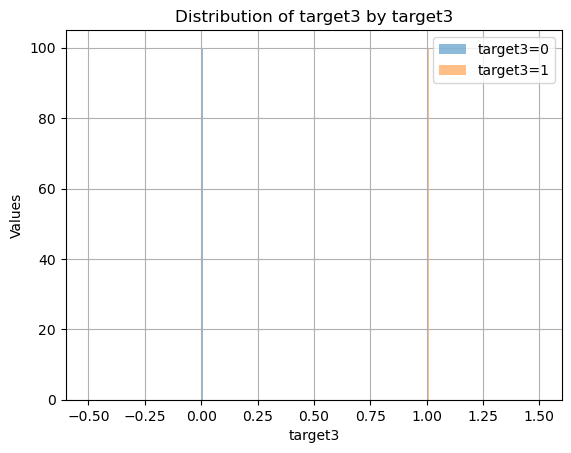

overview.aggregateRating
mean      3.97813
median    4.00000
std       0.52589
max       5.00000
min       1.00000
Name: overview.aggregateRating, dtype: float64
mean      3.838721
median    3.900000
std       0.546030
max       5.000000
min       1.000000
Name: overview.aggregateRating, dtype: float64


<Figure size 640x480 with 0 Axes>

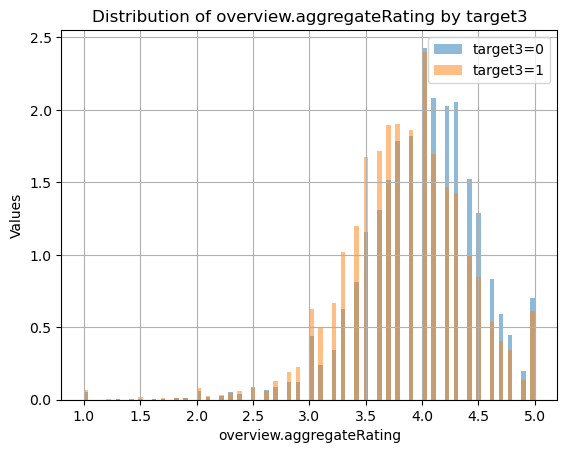

overview.reviewCount
mean         149.323398
median        45.000000
std          564.950216
max       107494.000000
min            1.000000
Name: overview.reviewCount, dtype: float64
mean        145.723661
median       46.000000
std         600.979894
max       25460.000000
min           1.000000
Name: overview.reviewCount, dtype: float64


<Figure size 640x480 with 0 Axes>

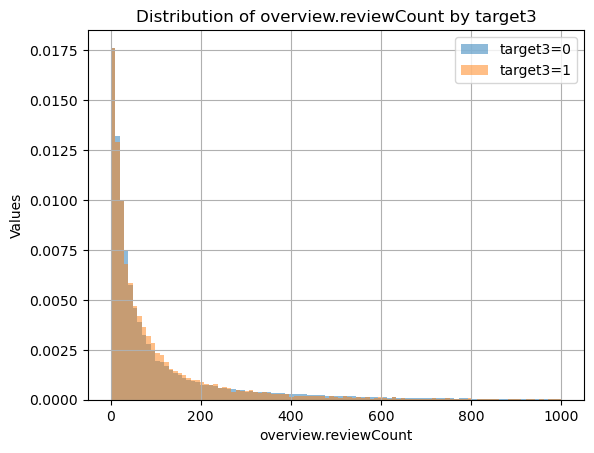

<Figure size 640x480 with 0 Axes>

In [19]:
pseudo_time_series=pd.read_pickle(data_folda+'train_with_master_google.pkl')
pseudo_time_series_test3=pd.read_pickle(data_folda+'skeleton_test_3month_master_google.pkl')
#print(pseudo_time_series[pseudo_time_series["eval_period"]==1].groupby('target3').mean())
# 'target3'それぞれでカラムの分布をプロット
import matplotlib.pyplot as plt

def plot_target3_distribution(pseudo_time_series):
    for c in pseudo_time_series.columns:
        # データ型がfloat64のカラムのみをプロット
        if (pseudo_time_series[c].dtype == 'float64') or (pseudo_time_series[c].dtype == 'int64'):
            print(c)
            # 1つの図にすべてのプロットを描画
            fig, ax = plt.subplots()
            for target3 in [0, 1]:
                # target3ごとにデータをフィルタリングし、プロット
                # もし c にprice_rangeが含まれている場合は、最小値0、最大値18でbins=19にする
                if(c.find('reviewCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=101,range=(0,1000), density=True)
                else:
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=100, density=True)
                
                print(pseudo_time_series[pseudo_time_series['target3'] == target3][c].aggregate(['mean','median','std','max','min']))
            
            plt.title(f"Distribution of {c} by target3")
            plt.xlabel(c)
            plt.ylabel("Values")
            plt.legend()
            plt.show()
            plt.savefig(f'../results/pic/{c}_by_target3.png')

# 関数を呼び出して、特定のeval_periodでフィルタリングされたデータセットの分布をプロット

pseudo_time_series["overview.reviewCount"]=pseudo_time_series["overview.reviewCount"].astype(float)
plot_target3_distribution(pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][["target3","restaurant_id","overview.aggregateRating","overview.reviewCount","general_rank_GOOGLE"]])




In [15]:
pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][["target3","overview.reviewCount"]].astype(float)

,target3,overview.reviewCount
7,0.0,300.0
8,0.0,300.0
9,0.0,300.0
10,0.0,300.0
11,0.0,300.0
...,...,...
14005019,0.0,227.0
14005020,0.0,227.0
14005021,0.0,227.0
14005022,0.0,227.0


* hitosara

infos.premium
mean      0.003520
median    0.000000
std       0.059226
max       1.000000
min       0.000000
Name: infos.premium, dtype: float64
mean      0.016925
median    0.000000
std       0.129010
max       1.000000
min       0.000000
Name: infos.premium, dtype: float64


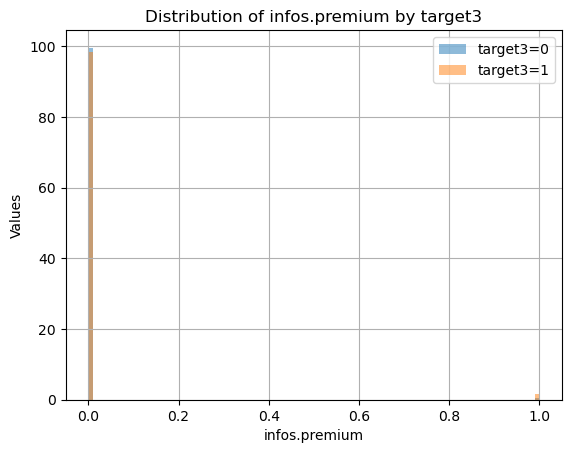

infos.onlineReservation_HITOSARA
mean      0.017175
median    0.000000
std       0.129922
max       1.000000
min       0.000000
Name: infos.onlineReservation_HITOSARA, dtype: float64
mean      0.095063
median    0.000000
std       0.293344
max       1.000000
min       0.000000
Name: infos.onlineReservation_HITOSARA, dtype: float64


<Figure size 640x480 with 0 Axes>

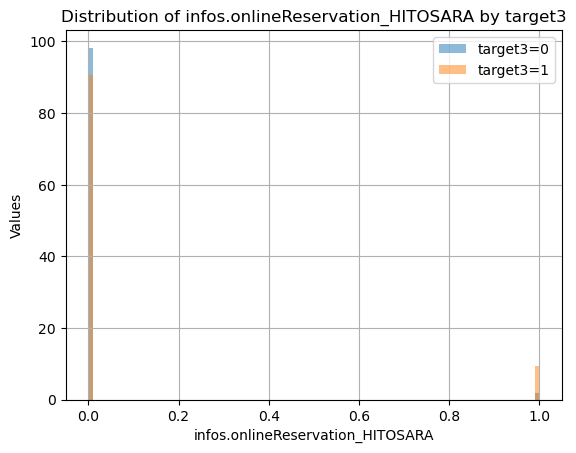

<Figure size 640x480 with 0 Axes>

In [5]:
add_list_hitosara=["target3","restaurant_id","general_rank_HITOSARA","infos.premium","infos.onlineReservation_HITOSARA"]


#pseudo_time_series=pd.read_pickle(data_folda+'train_with_master_structured_main_medias.pkl')
pseudo_time_series_test3=pd.read_pickle(data_folda+'test3_with_master_structured_main_medias.pkl')
#print(pseudo_time_series[pseudo_time_series["eval_period"]==1].groupby('target3').mean())
# 'target3'それぞれでカラムの分布をプロット
import matplotlib.pyplot as plt

def plot_target3_distribution(pseudo_time_series):
    for c in pseudo_time_series.columns:
        # データ型がfloat64のカラムのみをプロット
        if (pseudo_time_series[c].dtype == 'float64') or (pseudo_time_series[c].dtype == 'int64'):
            print(c)
            # 1つの図にすべてのプロットを描画
            fig, ax = plt.subplots()
            for target3 in [0, 1]:
                # target3ごとにデータをフィルタリングし、プロット
                # もし c にprice_rangeが含まれている場合は、最小値0、最大値18でbins=19にする
                if(c.find('reviewCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=101,range=(0,1000), density=True)
                else:
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=100, density=True)
                
                print(pseudo_time_series[pseudo_time_series['target3'] == target3][c].aggregate(['mean','median','std','max','min']))
            
            plt.title(f"Distribution of {c} by target3")
            plt.xlabel(c)
            plt.ylabel("Values")
            plt.legend()
            plt.show()
            plt.savefig(f'../results/pic/{c}_by_target3.png')

# 関数を呼び出して、特定のeval_periodでフィルタリングされたデータセットの分布をプロット
pseudo_time_series["overview.reviewCount"]=pseudo_time_series["overview.reviewCount"].astype(float)
plot_target3_distribution(pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][add_list_hitosara])




* tripadvisor

Index(['target3', 'restaurant_id', 'general_rank_HOTPEPPER',
       'infos.aggregateRating', 'infos.ratingReview',
       'infos.satisfaction.percentage1', 'infos.satisfaction.percentage2',
       'infos.satisfaction.percentage3', 'infos.couponCount',
       'infos.onlineReservation_HOTPEPPER', 'infos.ownerRegistration',
       'infos.ticket', 'photos.allCount', 'photos.appearanceCount',
       'photos.drinkCount', 'photos.foodCount', 'photos.otherCount',
       'photos.postCount', 'menus.courseListCount'],
      dtype='object')
infos.couponCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean      0.404295
median    0.000000
std       1.129923
max       9.000000
min       0.000000
Name: infos.couponCount, dtype: float64
mean      0.469182
median    0.000000
std       1.234974
max       8.000000
min       0.000000
Name: infos.couponCount, dtype: float64


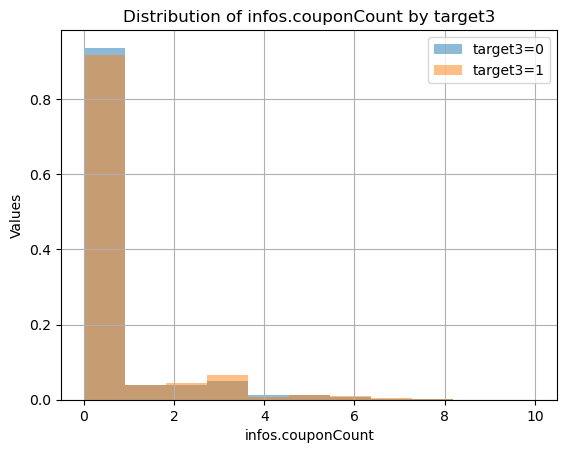

photos.allCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       41.082664
median     31.000000
std        33.953813
max       308.000000
min         1.000000
Name: photos.allCount, dtype: float64
mean       42.094054
median     32.000000
std        33.898097
max       237.000000
min         1.000000
Name: photos.allCount, dtype: float64


<Figure size 640x480 with 0 Axes>

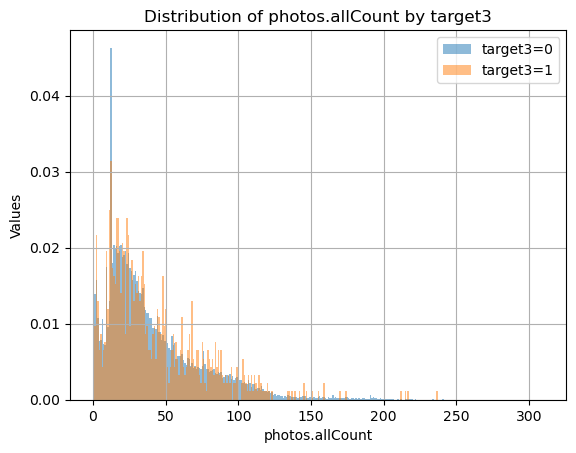

photos.appearanceCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       8.290599
median     8.000000
std        4.796374
max       88.000000
min        1.000000
Name: photos.appearanceCount, dtype: float64
mean       8.129032
median     8.000000
std        4.613023
max       26.000000
min        1.000000
Name: photos.appearanceCount, dtype: float64


<Figure size 640x480 with 0 Axes>

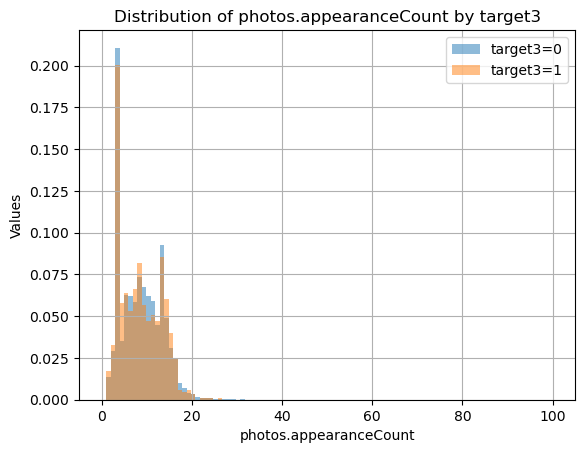

photos.drinkCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean        6.639522
median      2.000000
std        13.849836
max       110.000000
min         1.000000
Name: photos.drinkCount, dtype: float64
mean       6.758523
median     3.000000
std       12.083338
max       68.000000
min        1.000000
Name: photos.drinkCount, dtype: float64


<Figure size 640x480 with 0 Axes>

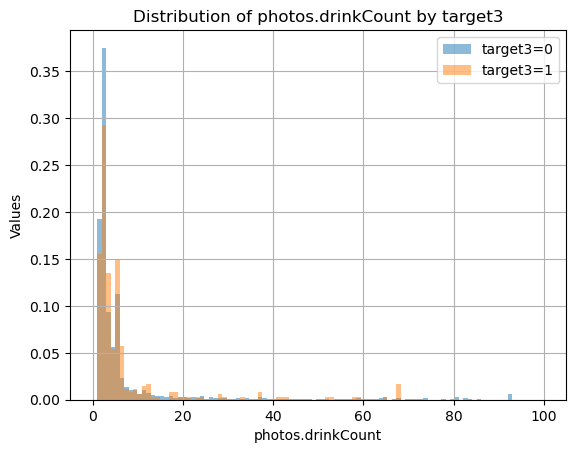

photos.foodCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       21.649048
median     12.000000
std        22.540887
max       123.000000
min         1.000000
Name: photos.foodCount, dtype: float64
mean      23.175520
median    13.000000
std       23.355145
max       94.000000
min        1.000000
Name: photos.foodCount, dtype: float64


<Figure size 640x480 with 0 Axes>

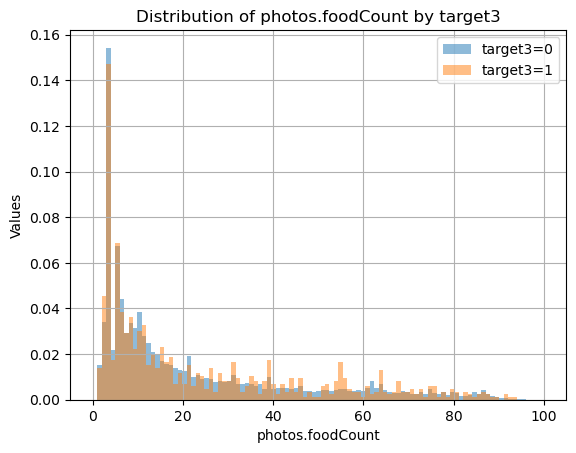

photos.otherCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       6.439635
median     6.000000
std        3.328126
max       36.000000
min        1.000000
Name: photos.otherCount, dtype: float64
mean       6.225806
median     6.000000
std        3.163241
max       16.000000
min        1.000000
Name: photos.otherCount, dtype: float64


<Figure size 640x480 with 0 Axes>

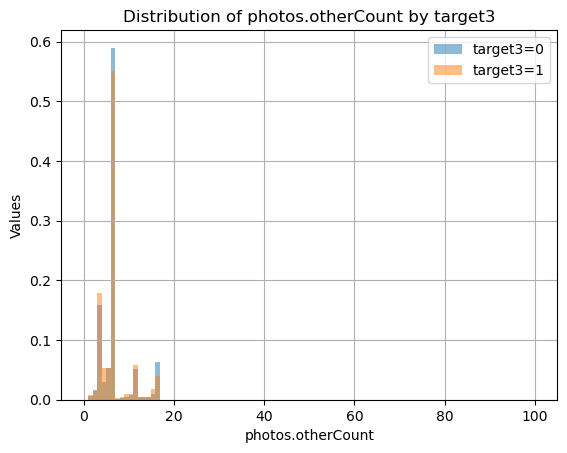

photos.postCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       14.042304
median      6.000000
std        23.680062
max       262.000000
min         1.000000
Name: photos.postCount, dtype: float64
mean       12.604192
median      6.000000
std        20.385118
max       191.000000
min         1.000000
Name: photos.postCount, dtype: float64


<Figure size 640x480 with 0 Axes>

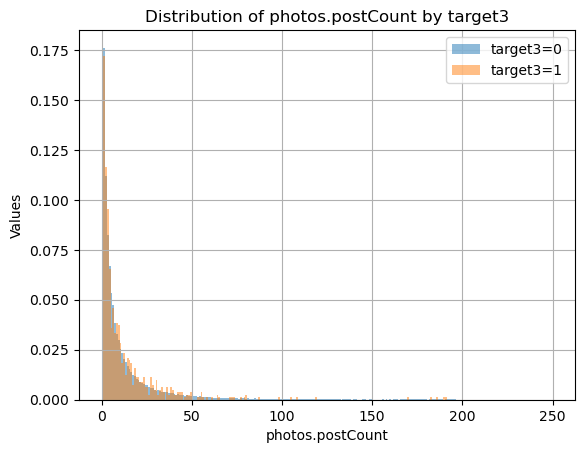

menus.courseListCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       5.526366
median     4.000000
std        4.777114
max       31.000000
min        0.000000
Name: menus.courseListCount, dtype: float64
mean       5.740177
median     4.000000
std        4.908779
max       31.000000
min        1.000000
Name: menus.courseListCount, dtype: float64


<Figure size 640x480 with 0 Axes>

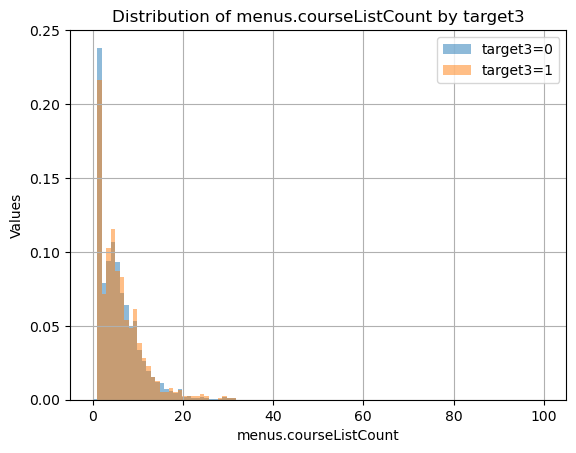

<Figure size 640x480 with 0 Axes>

In [45]:
add_list_hotpepper=['target3','restaurant_id','general_rank_HOTPEPPER','infos.aggregateRating','infos.ratingReview',
          'infos.satisfaction.percentage1','infos.satisfaction.percentage2','infos.satisfaction.percentage3',
          'infos.couponCount','infos.onlineReservation_HOTPEPPER','infos.ownerRegistration','infos.ticket',
          'photos.allCount','photos.appearanceCount','photos.drinkCount','photos.foodCount','photos.otherCount',
          'photos.postCount','menus.courseListCount']


pseudo_time_series=pd.read_pickle(data_folda+'test3_with_master_structured_main_medias.pkl')
temp=pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][add_list_hotpepper]


import matplotlib.pyplot as plt

def plot_target3_distribution(pseudo_time_series):
    for c in pseudo_time_series.columns:
        # データ型がfloat64のカラムのみをプロット
        if (pseudo_time_series[c].dtype == 'float64') or (pseudo_time_series[c].dtype == 'int64'):
            print(c)
            # 1つの図にすべてのプロットを描画
            fig, ax = plt.subplots()
            
            # target=0,1で、分布の違いを検定する
            # ks検定
            from scipy.stats import ks_2samp
            print(ks_2samp(pseudo_time_series[pseudo_time_series['target3'] == 0][c], pseudo_time_series[pseudo_time_series['target3'] == 1][c]))
            # t検定
            from scipy.stats import ttest_ind
            print(ttest_ind(pseudo_time_series[pseudo_time_series['target3'] == 0][c], pseudo_time_series[pseudo_time_series['target3'] == 1][c]))
                        
            for target3 in [0, 1]:
                # target3ごとにデータをフィルタリングし、プロット
                # infos.couponCountの場合は、最小値0、最大値10でbins=11にする
                # photos.appearanceCountの場合は、最小値0、最大値300でbins=301にする
                # 他は最大値100でbins=101にする
                # photos.postCountの場合は、最小値0、最大値250でbins=251にする
                
                
                
                if(c.find('couponCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=11,range=(0,10), density=True)
                elif(c.find('photos.allCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=311,range=(0,310), density=True)
                elif(c.find('postCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=251,range=(0,250), density=True)
                else:
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=101,range=(0,100), density=True)
                print(pseudo_time_series[pseudo_time_series['target3'] == target3][c].aggregate(['mean','median','std','max','min']))
                        
            plt.title(f"Distribution of {c} by target3")
            plt.xlabel(c)
            plt.ylabel("Values")
            plt.legend()
            plt.show()
            plt.savefig(f'../results/pic/{c}_by_target3.png')



# object型をfloat or int型に変換
def convert_to_float(pseudo_time_series):
    print(pseudo_time_series.columns)
    for c in pseudo_time_series.columns:
        if pseudo_time_series[c].dtype == 'object':
            try:
                pseudo_time_series[c] = pseudo_time_series[c].replace('',np.nan).astype(float)
            except:
                pass
            
    return pseudo_time_series

temp=convert_to_float(temp)

plot_target3_distribution(temp)

In [38]:
pseudo_time_series=pd.read_pickle(data_folda+'test3_with_master_structured_main_medias.pkl')
temp=pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][add_list_hotpepper]

# object型をfloat or int型に変換
def convert_to_float(pseudo_time_series):
    print(pseudo_time_series.columns)
    for c in pseudo_time_series.columns:
        if pseudo_time_series[c].dtype == 'object':
            try:
                pseudo_time_series[c] = pseudo_time_series[c].replace('',np.nan).astype(float)
            except:
                pass
            
    return pseudo_time_series

temp=convert_to_float(temp)

Index(['target3', 'restaurant_id', 'general_rank_HOTPEPPER',
       'infos.aggregateRating', 'infos.ratingReview',
       'infos.satisfaction.percentage1', 'infos.satisfaction.percentage2',
       'infos.satisfaction.percentage3', 'infos.couponCount',
       'infos.onlineReservation_HOTPEPPER', 'infos.ownerRegistration',
       'infos.ticket', 'photos.allCount', 'photos.appearanceCount',
       'photos.drinkCount', 'photos.foodCount', 'photos.otherCount',
       'photos.postCount', 'menus.courseListCount'],
      dtype='object')


In [37]:
temp["photos.allCount"].replace('',np.nan).astype(float)

0         23.0
1         99.0
2          NaN
3          NaN
4          NaN
          ... 
844317     NaN
844318     NaN
844319     NaN
844320     NaN
844321     NaN
Name: photos.allCount, Length: 844322, dtype: float64

* V_TRIPADVISOR 

Index(['target3', 'restaurant_id', 'general_rank_TRIPADVISOR',
       'infos.aggregateRating_TRIPADVISOR', 'infos.reviewCount',
       'infos.qa_count'],
      dtype='object')
infos.aggregateRating_TRIPADVISOR
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean      3.894157
median    4.000000
std       0.644623
max       5.000000
min       0.000000
Name: infos.aggregateRating_TRIPADVISOR, dtype: float64
mean      3.860013
median    4.000000
std       0.611276
max       5.000000
min       0.000000
Name: infos.aggregateRating_TRIPADVISOR, dtype: float64


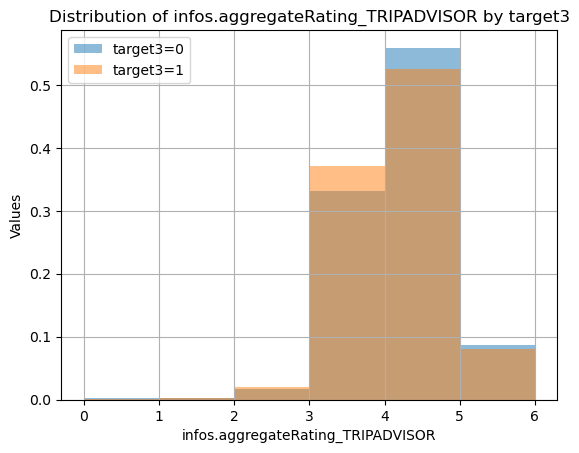

infos.reviewCount
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean        10.472796
median       4.000000
std         33.691014
max       3166.000000
min          1.000000
Name: infos.reviewCount, dtype: float64
mean        8.211735
median      4.000000
std        12.475214
max       173.000000
min         1.000000
Name: infos.reviewCount, dtype: float64


<Figure size 640x480 with 0 Axes>

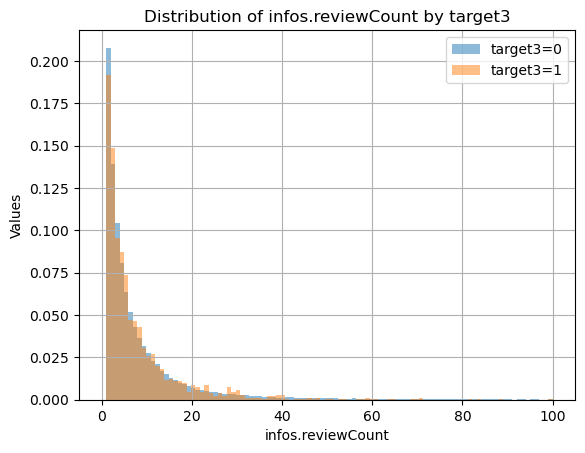

infos.qa_count
KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=nan)
TtestResult(statistic=nan, pvalue=nan, df=nan)
mean       0.039530
median     0.000000
std        0.505004
max       62.000000
min        0.000000
Name: infos.qa_count, dtype: float64
mean      0.014365
median    0.000000
std       0.162258
max       4.000000
min       0.000000
Name: infos.qa_count, dtype: float64


<Figure size 640x480 with 0 Axes>

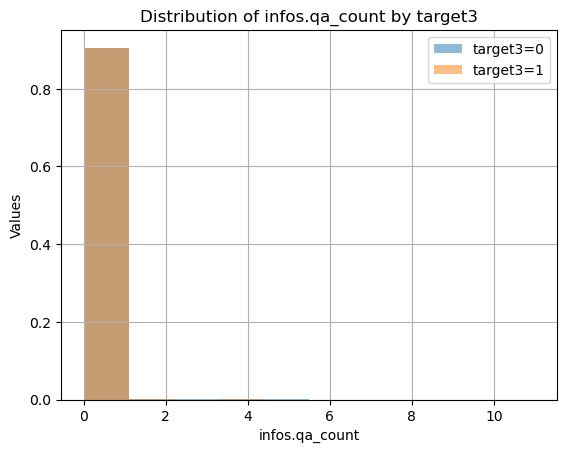

<Figure size 640x480 with 0 Axes>

In [51]:
add_list_tripadvisor=["target3","restaurant_id",'general_rank_TRIPADVISOR','infos.aggregateRating_TRIPADVISOR',"infos.reviewCount","infos.qa_count"]



#pseudo_time_series=pd.read_pickle(data_folda+'test3_with_master_structured_main_medias.pkl')
temp=pseudo_time_series[(pseudo_time_series["eval_period"]==1)
                                             &(pseudo_time_series["base_date"]>"2023-02-28")][add_list_tripadvisor]


import matplotlib.pyplot as plt

def plot_target3_distribution(pseudo_time_series):
    for c in pseudo_time_series.columns:
        # データ型がfloat64のカラムのみをプロット
        if (pseudo_time_series[c].dtype == 'float64') or (pseudo_time_series[c].dtype == 'int64'):
            print(c)
            # 1つの図にすべてのプロットを描画
            fig, ax = plt.subplots()
            
            # target=0,1で、分布の違いを検定する
            # ks検定
            from scipy.stats import ks_2samp
            print(ks_2samp(pseudo_time_series[pseudo_time_series['target3'] == 0][c], pseudo_time_series[pseudo_time_series['target3'] == 1][c]))
            # t検定
            from scipy.stats import ttest_ind
            print(ttest_ind(pseudo_time_series[pseudo_time_series['target3'] == 0][c], pseudo_time_series[pseudo_time_series['target3'] == 1][c]))
                        
            for target3 in [0, 1]:
                # target3ごとにデータをフィルタリングし、プロット
                # infos.couponCountの場合は、最小値0、最大値10でbins=11にする
                # photos.appearanceCountの場合は、最小値0、最大値300でbins=301にする
                # 他は最大値100でbins=101にする
                # photos.postCountの場合は、最小値0、最大値250でbins=251にする
                
                
                
                if(c.find('infos.aggregateRating_TRIPADVISOR') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=6,range=(0,6), density=True)
                elif(c.find('infos.qa_count') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=10,range=(0,11), density=True)
                elif(c.find('postCount') != -1):
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=251,range=(0,250), density=True)
                else:
                    pseudo_time_series[pseudo_time_series['target3'] == target3][c].hist(alpha=0.5, ax=ax, label=f"target3={target3}", bins=101,range=(0,100), density=True)
                print(pseudo_time_series[pseudo_time_series['target3'] == target3][c].aggregate(['mean','median','std','max','min']))
                        
            plt.title(f"Distribution of {c} by target3")
            plt.xlabel(c)
            plt.ylabel("Values")
            plt.legend()
            plt.show()
            plt.savefig(f'../results/pic/{c}_by_target3.png')



# object型をfloat or int型に変換
def convert_to_float(pseudo_time_series):
    print(pseudo_time_series.columns)
    for c in pseudo_time_series.columns:
        if pseudo_time_series[c].dtype == 'object':
            try:
                pseudo_time_series[c] = pseudo_time_series[c].replace('',np.nan).astype(float)
            except:
                pass
            
    return pseudo_time_series

temp=convert_to_float(temp)

plot_target3_distribution(temp)